In [1]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE

In [2]:
# load data set
bank_data = pd.read_csv("bank-additional-full.csv", sep=';')
print("Shape of DataFrame is ", bank_data.shape)

Shape of DataFrame is  (41188, 21)


### Exploratory data analysis

In [3]:
# Closer look at data
bank_data.head().T

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


In [4]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
# Statistical summary of our dataset
bank_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [6]:
# iterated through bank_data and stored data with datatype as 'object' to new variable cat_col

cat_col = [n for n in bank_data.columns if bank_data[n].dtypes == 'object']
cat_col.remove('y')

### Visualization

#### Categorical columns exploration

IndexError: index 3 is out of bounds for axis 0 with size 3

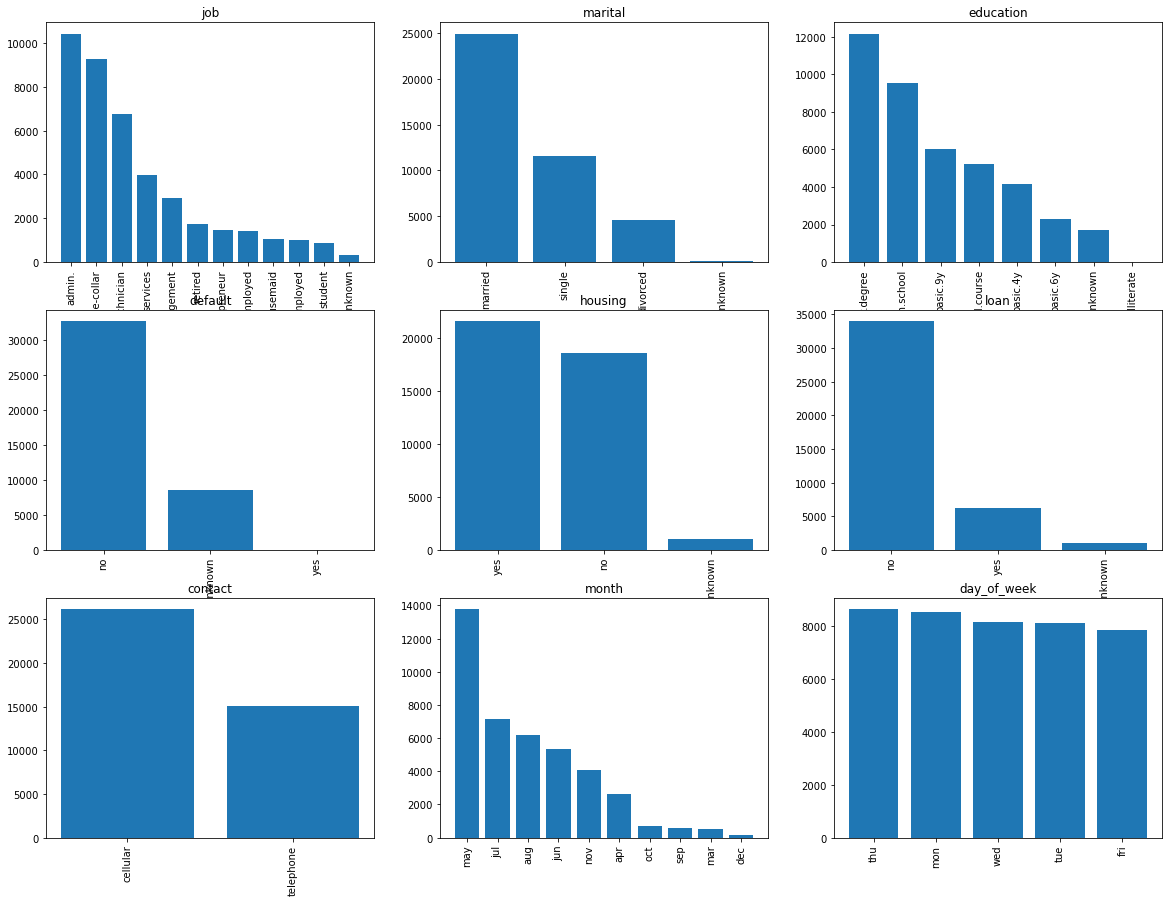

In [7]:
fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for col in cat_col:
    value_counts = bank_data[col].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(col)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()
#plt.savefig('dataset_cat_columns_exploration.png')

#### Numerical columns exploration

IndexError: index 2 is out of bounds for axis 0 with size 2

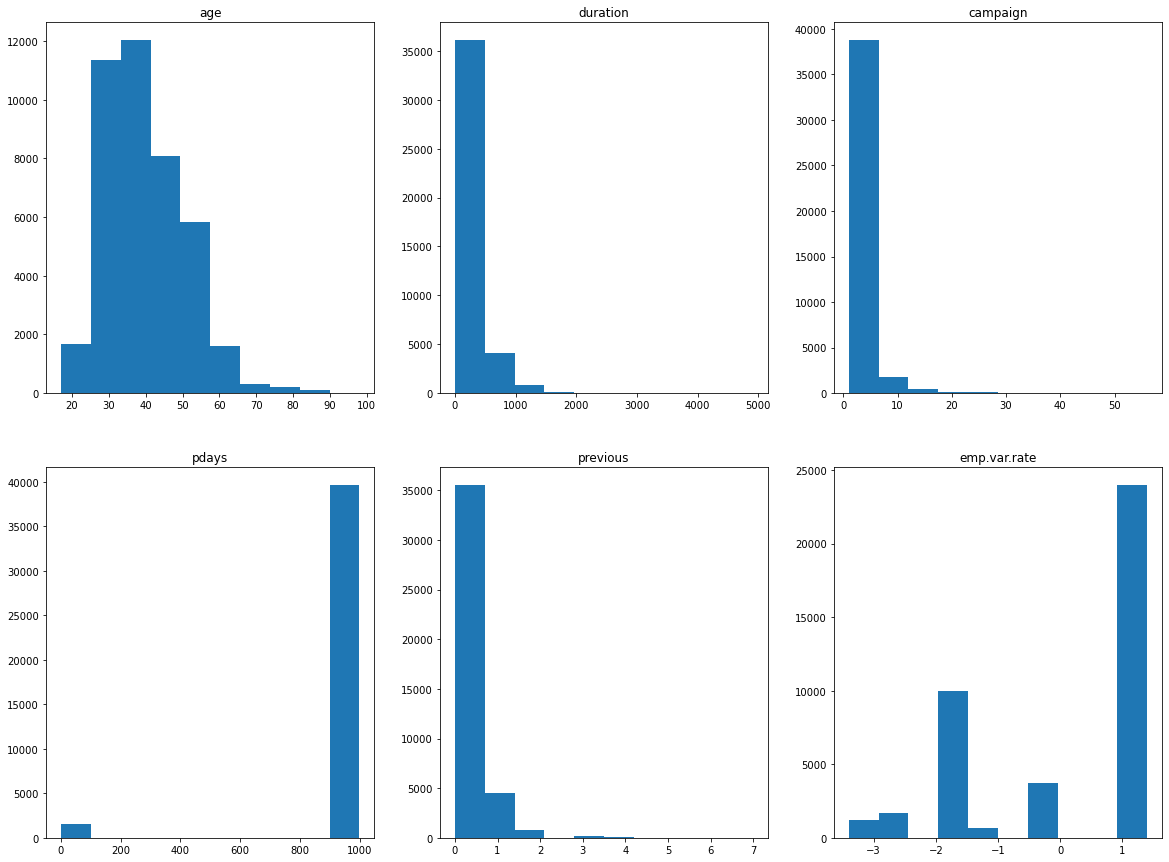

In [8]:
num_columns = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
              'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr_employed']

fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for num_column in num_columns:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].hist(bank_data[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()
#plt.savefig("dataset_num_columns_exploration.png")

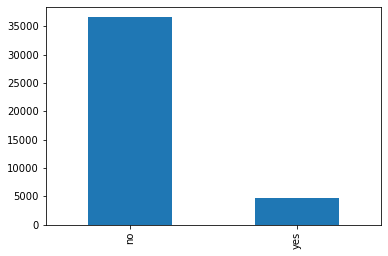

In [9]:
# column y has unbalanced data
bank_data['y'].value_counts().plot.bar()

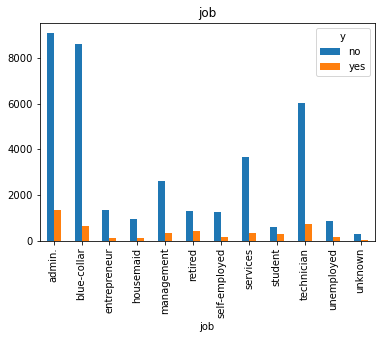

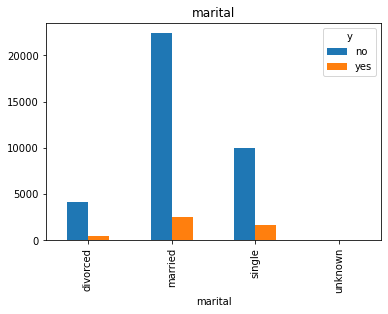

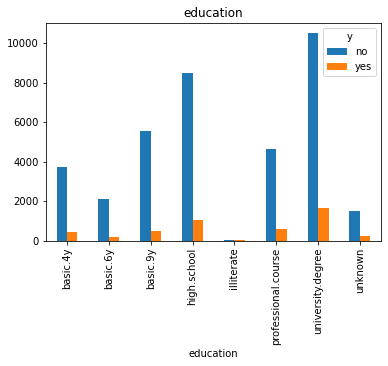

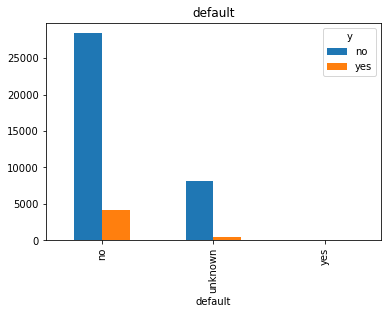

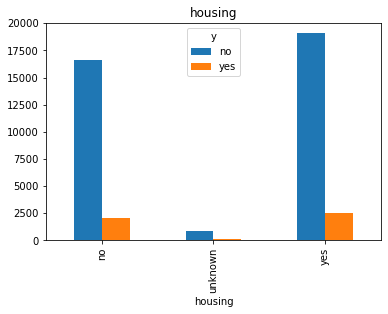

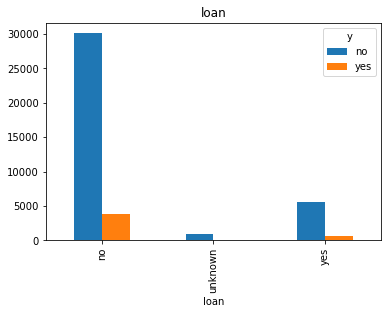

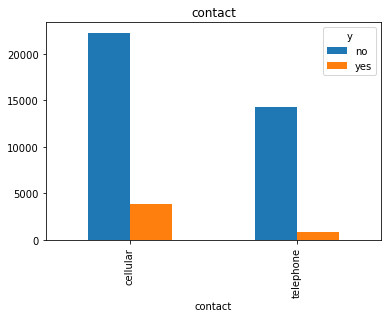

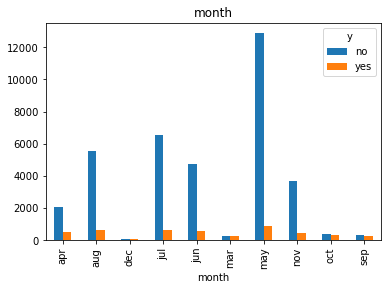

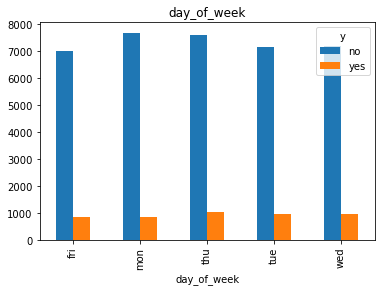

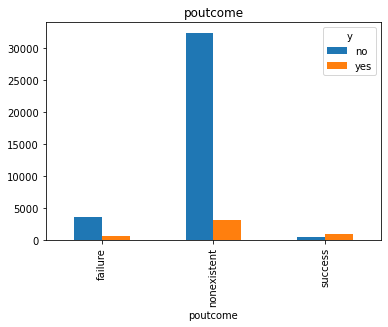

In [10]:
for col in cat_col:
    pd.crosstab(bank_data[col], bank_data.y).plot(kind = 'bar')
    plt.title(col)
    #plt.savefig(col + ".png")

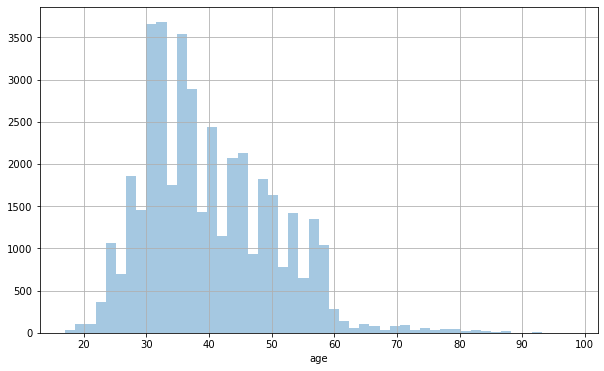

In [11]:
plt.figure(figsize = (10, 6))
plt.grid(b = True)
sns.distplot(a = bank_data['age'], kde = False)

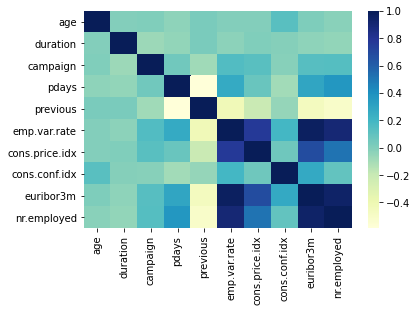

In [12]:
data_heatmap = bank_data.loc[:, bank_data.columns != 'y']
sns.heatmap(data_heatmap.corr(),cmap="YlGnBu")
plt.show()

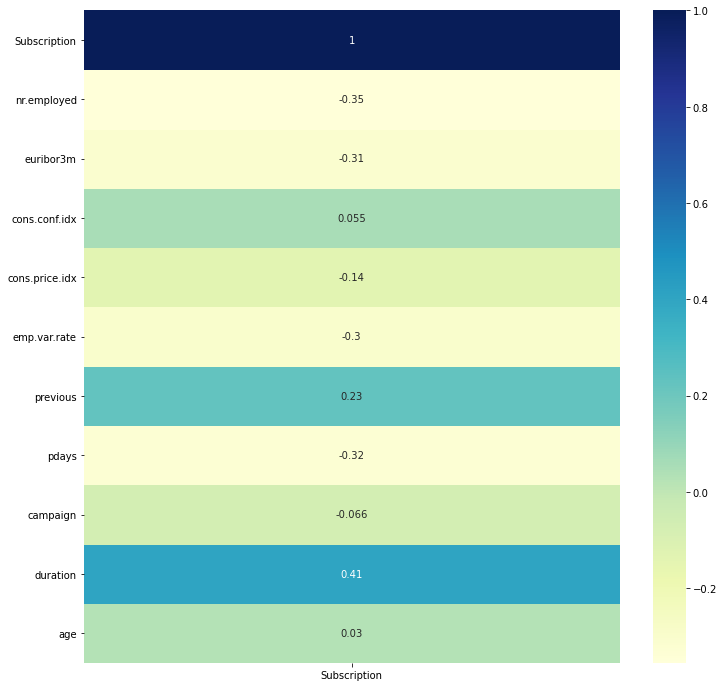

In [15]:
target_heatmap = bank_data.loc[:, bank_data.columns == 'y']
data_heatmap['Subscription'] = target_heatmap
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data_heatmap.corr()[['Subscription']], cmap='YlGnBu', annot=True);
ax.invert_yaxis()

### Feature engineering

In [14]:
# Transform 'yes' and 'no'  into (0,1) dependency
bank_data['y']=[1 if i=='yes' else 0 for i in bank_data['y']]

In [16]:
# Create dummy variable for the categorical data and drop first column 
# to avoid dummy varibale trap
bank_data = pd.get_dummies(bank_data,columns = ['job','marital','education',
                                                'default', 'housing','loan',
                                                'month', 'contact',
                                                'day_of_week','poutcome'], 
                                                drop_first = True)


In [17]:
bank_data.shape

(41188, 54)

In [18]:
bank_data.head().T

,0,1,2,3,4
age,56.000,57.000,37.000,40.000,56.000
duration,261.000,149.000,226.000,151.000,307.000
campaign,1.000,1.000,1.000,1.000,1.000
pdays,999.000,999.000,999.000,999.000,999.000
previous,0.000,0.000,0.000,0.000,0.000
emp.var.rate,1.100,1.100,1.100,1.100,1.100
cons.price.idx,93.994,93.994,93.994,93.994,93.994
cons.conf.idx,-36.400,-36.400,-36.400,-36.400,-36.400
euribor3m,4.857,4.857,4.857,4.857,4.857
nr.employed,5191.000,5191.000,5191.000,5191.000,5191.000


### Preprocessing

In [82]:
# split dataset into data and target sets
data = bank_data.loc[:, bank_data.columns != 'y']
target = bank_data.loc[:, bank_data.columns == 'y']

In [83]:
data_np = np.array(data)
target_np = np.array(target)
#target_np = target_np.ravel()

print(data_np.shape)
print(target_np.shape)

(41188, 53)
(41188, 1)


In [84]:
# split data and target sets into 4 sets for train and test purposes
bank_train_data, bank_test_data, \
bank_train_target, bank_test_target = \
train_test_split(data_np, target_np, test_size=0.1)

bank_train_data_basic = np.copy(bank_train_data)
bank_test_data_basic = np.copy(bank_test_data)

In [85]:
# scale data
sc = StandardScaler()
bank_train_data = sc.fit_transform(bank_train_data)
bank_test_data = sc.transform(bank_test_data)

### Learning

In [86]:
# Training our model
logistic_regression = LogisticRegression()
logistic_regression.fit(bank_train_data, bank_train_target)

log_reg_basic = LogisticRegression()
log_reg_basic.fit(bank_train_data_basic, bank_train_target.ravel())



C:\Users\Grzegorz\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Grzegorz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Model evaluation

In [87]:
# Evaluate accuracy of our model
print("Basic Logistic Regression")
accu_score = accuracy_score(bank_test_target, log_reg_basic.predict(bank_test_data_basic))
print("Basic model accuracy = {}".format(accu_score))

Basic Logistic Regression
Basic model accuracy = 0.9150279193979121


Basic Logistic Regression with scaled data
Basic model accuracy of scaled data= 0.9164845836368051
[[3569   98]
 [ 246  206]]


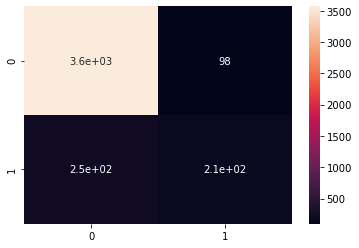

In [88]:
# Evaluate accuracy of our model
print("Basic Logistic Regression with scaled data")
accu_score = accuracy_score(bank_test_target, logistic_regression.predict(bank_test_data))
print("Basic model accuracy of scaled data= {}".format(accu_score))

# confusion matrix
conf_matrix = confusion_matrix(bank_test_target, logistic_regression.predict(bank_test_data))
print(conf_matrix)

sns.heatmap(conf_matrix, annot=True)
plt.show()

In [89]:
def cross_valid_data(numbOfIteration):
    print("\nCross walidacja:")
    scores = cross_val_score(LogisticRegression(), data_np, target_np.ravel(), cv=numbOfIteration)
    plt.figure(figsize=(1, 5))
    sns.heatmap(scores[:, np.newaxis],annot=True)
    plt.show()
    
def compare_given_result_with_real(left_bound, right_bound):
    for i in range(left_bound, right_bound):
        pred = logistic_regression.predict(bank_test_data[i, :].reshape(1, -1))
        print("\nModel predicted for client {0} value {1}".format(i, pred))
        print("Real value for client \"{0}\" is {1}".format(i, bank_test_target[i]))
        #Wyświetlenie 
        print(logistic_regression.predict_proba(bank_test_data[i,:].reshape(1,-1)))
        


Model predicted for client 0 value [0]
Real value for client "0" is [0]
[[0.90170359 0.09829641]]

Model predicted for client 1 value [0]
Real value for client "1" is [0]
[[0.9870929 0.0129071]]

Model predicted for client 2 value [0]
Real value for client "2" is [0]
[[0.98401171 0.01598829]]

Model predicted for client 3 value [0]
Real value for client "3" is [0]
[[0.99461501 0.00538499]]

Model predicted for client 4 value [0]
Real value for client "4" is [0]
[[0.98415891 0.01584109]]

Model predicted for client 5 value [0]
Real value for client "5" is [0]
[[0.978864 0.021136]]

Model predicted for client 6 value [0]
Real value for client "6" is [0]
[[0.99578215 0.00421785]]

Model predicted for client 7 value [0]
Real value for client "7" is [0]
[[0.99212674 0.00787326]]

Model predicted for client 8 value [0]
Real value for client "8" is [0]
[[0.96257266 0.03742734]]

Model predicted for client 9 value [1]
Real value for client "9" is [0]
[[0.4326877 0.5673123]]

Cross walidacja:


C:\Users\Grzegorz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Grzegorz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

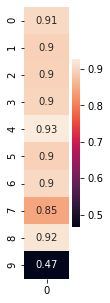

In [90]:
compare_given_result_with_real(0, 10)
cross_valid_data(10)

C:\Users\Grzegorz\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Grzegorz\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


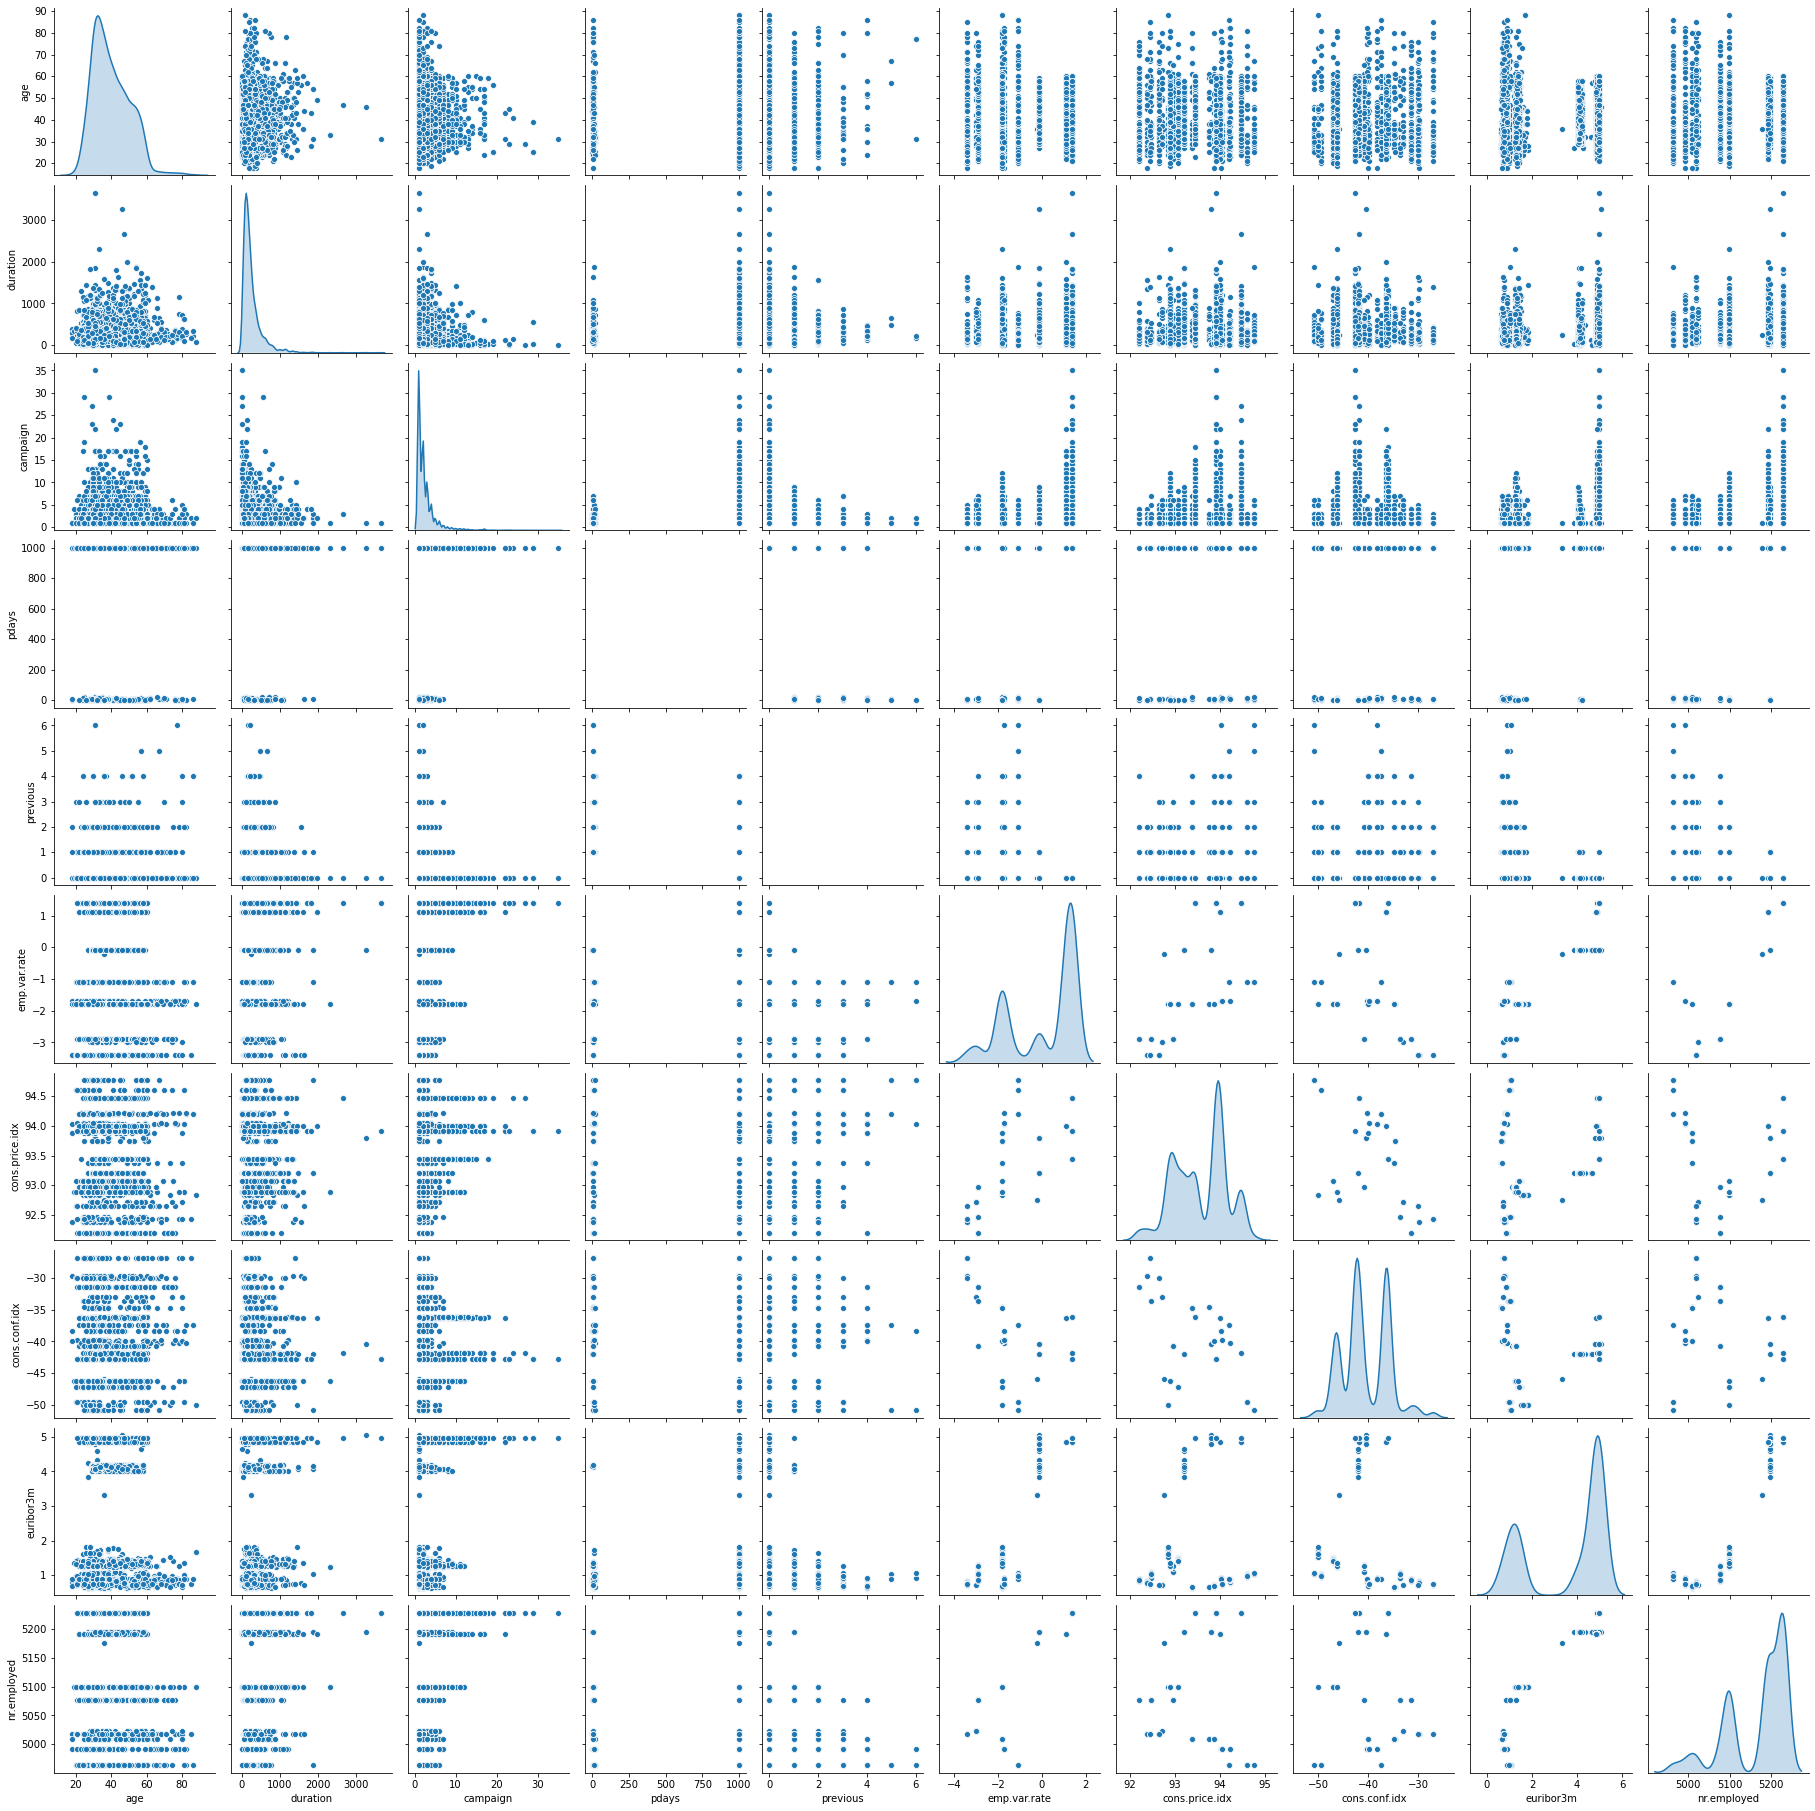

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

bank_data2 = pd.read_csv("bank-additional.csv", sep=';')
data2 = bank_data2.loc[:, bank_data2.columns != 'y']

sns.pairplot(data2, diag_kind = "kde")

In [91]:
# Mean squared error and variance score of a basic logistic model
from sklearn.metrics import mean_squared_error

m_squared_error = mean_squared_error(bank_test_target, logistic_regression.predict(bank_test_data))
print("Mean squared error = %.2f" % m_squared_error)

var_score = logistic_regression.score(bank_test_data, bank_test_target)
print("Logistic Regression variance score: %.2f" % var_score)

Mean squared error = 0.08
Logistic Regression variance score: 0.92


C:\Users\Grzegorz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Grzegorz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

Text(0, 0.5, 'Accuracy score')

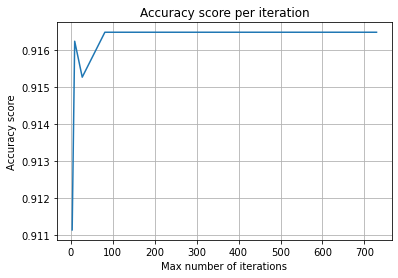

In [97]:
i = 3
x = []
y_acc = []

while i <= 729:
    x.append(i)
    logistic_regression = LogisticRegression(max_iter=i)
    logistic_regression.fit(bank_train_data, bank_train_target.ravel())
    acc = accuracy_score(bank_test_target, logistic_regression.predict(bank_test_data))
    y_acc.append(acc)
    i *= 3

plt.plot(x, y_acc)
plt.title("Accuracy score per iteration")
plt.grid()
plt.xlabel("Max number of iterations")
plt.ylabel("Accuracy score")

C:\Users\Grzegorz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model LogisticRegression basic - Test data = 10 %
Model accuracy is 0.91
[[3570   89]
 [ 295  165]]


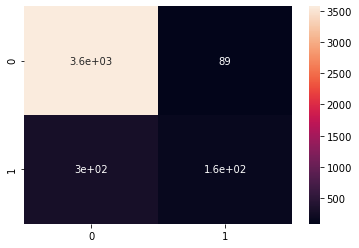

C:\Users\Grzegorz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model LogisticRegression basic - Test data = 20 %
Model accuracy is 0.91
[[7107  189]
 [ 575  367]]


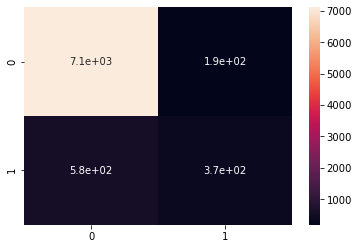

C:\Users\Grzegorz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model LogisticRegression basic - Test data = 30 %
Model accuracy is 0.91
[[10689   274]
 [  820   574]]


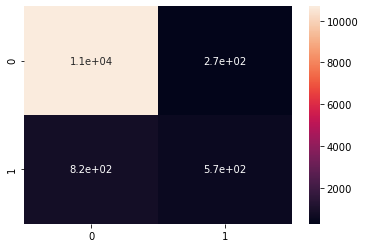

C:\Users\Grzegorz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model LogisticRegression basic - Test data = 40 %
Model accuracy is 0.91
[[14241   341]
 [ 1167   727]]


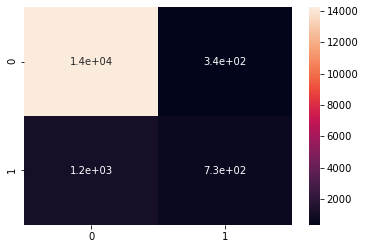

C:\Users\Grzegorz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model LogisticRegression basic - Test data = 50 %
Model accuracy is 0.91
[[17869   473]
 [ 1399   853]]


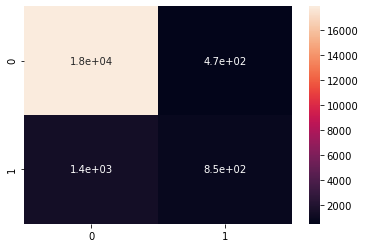

<Figure size 432x288 with 0 Axes>

In [100]:
for size in range (1,6):
    target_np = target_np.ravel()
    
    bank_train_data, bank_test_data, \
    bank_train_target, bank_test_target = \
    train_test_split(data_np, target_np, test_size=(size/10))
    
    log_reg = LogisticRegression()
    log_reg.fit(bank_train_data, bank_train_target)

    #Skutecznośc naszego modelu
    print("Model LogisticRegression basic - Test data = {} %".format(size*10))
    acc = accuracy_score(bank_test_target, log_reg.predict(bank_test_data))
    print("Model accuracy is {0:0.2f}".format(acc))
    conf_matrix = confusion_matrix(bank_test_target, log_reg.predict(bank_test_data))
    print(conf_matrix)
    sns.heatmap(conf_matrix,annot=True)
    plt.show()
    plt.savefig("dataset" + str(size*10) + ".png")

C:\Users\Grzegorz\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Grzegorz\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Grzegorz\anaconda3\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\Users\Grzegorz\anaconda3\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\Users\Grzegorz\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm

Solver:newton-cg


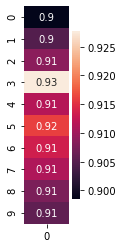

C:\Users\Grzegorz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Grzegorz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

Solver:lbfgs


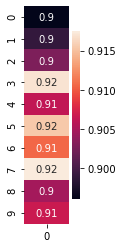

Solver:liblinear


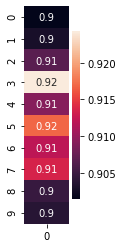

C:\Users\Grzegorz\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Grzegorz\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Grzegorz\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Grzegorz\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Grzegorz\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was rea

Solver:sag


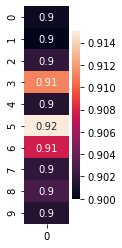

C:\Users\Grzegorz\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Grzegorz\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Grzegorz\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Grzegorz\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Grzegorz\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was rea

Solver:saga


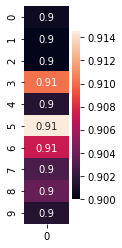

In [101]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']


for sol in solvers:
    scores = cross_val_score(LogisticRegression(solver=sol), bank_train_data, bank_train_target, cv=10)
    plt.figure(figsize=(1,4))
    sns.heatmap(scores[:, np.newaxis],annot=True)
    print("Solver:" + sol)
    plt.show()

## Polynomial features and RFE

In [73]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error

bank_data2 = pd.read_csv("bank-additional.csv", sep=';')

bank_data2['y']=[1 if i=='yes' else 0 for i in bank_data2['y']]

bank_data2 = pd.get_dummies(bank_data2,columns = ['job','marital','education','default',
                                   'housing','loan','month', 'contact',
                                   'day_of_week','poutcome'], drop_first = True)

data2 = bank_data2.loc[:, bank_data2.columns != 'y']
target2 = bank_data2.loc[:, bank_data2.columns == 'y']

data2 = np.array(data2)
target2 = np.array(target2)

bank_train_data, bank_test_data, \
bank_train_target, bank_test_target = \
train_test_split(data2, target2, test_size=0.1)

pf = PolynomialFeatures(2, )
    
bank_train_poly = pf.fit_transform(bank_train_data)
bank_test_poly = pf.fit_transform(bank_test_data)

print("train poly size {}".format(bank_train_poly.size))
print("test poly size {}".format(bank_test_poly.size))


train poly size 5504895
test poly size 611820


In [ ]:
x = [4, 16, 32, 64]
y_mean_error = []
y_r2_score = []

for feat in x:
    sel_ = RFE(estimator=LogisticRegression(solver='lbfgs', max_iter=300), n_features_to_select=feat)
    sel_.fit(bank_train_poly, bank_train_target)
    y_mean_error.append(mean_squared_error(bank_test_target, sel_.predict(bank_test_poly)))
    y_r2_score.append(sel_.score(bank_test_poly, bank_test_target))

plt.plot(x, y_mean_error)
plt.title("Mean error")
plt.grid()
plt.xlabel("No. Features")
plt.ylabel("Mean error")
plt.show()

plt.plot(x,y_r2_score)
plt.title("Score")
plt.grid()
plt.xlabel("No. Features")
plt.ylabel("Score")
plt.show()